# House Price Prediction

## Importing the Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [126]:
df = pd.read_csv('/content/BostonHousing.csv')

In [127]:
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [128]:
df = df.rename(columns = {'medv': 'price'})

In [129]:
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


## Exploratory Data Analysis

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [131]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Identifing the correlation in the values

In [132]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Scatter plot for some values just to check.

Text(0, 0.5, 'price')

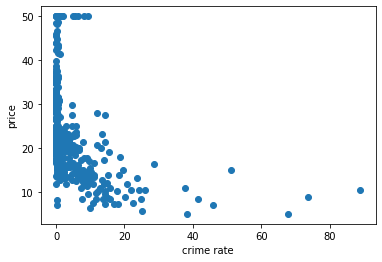

In [133]:
plt.scatter(df['crim'], df['price'])
plt.xlabel('crime rate')
plt.ylabel('price')

#### Regression line for the variables to check the positive correlation and negative correlation.

<Axes: xlabel='rm', ylabel='price'>

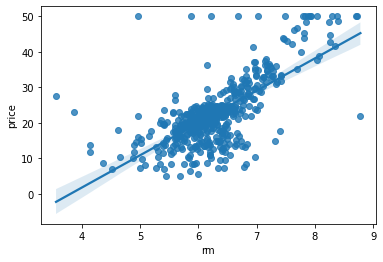

In [134]:
sns.regplot(x = "rm", y = "price", data=df)

<Axes: xlabel='lstat', ylabel='price'>

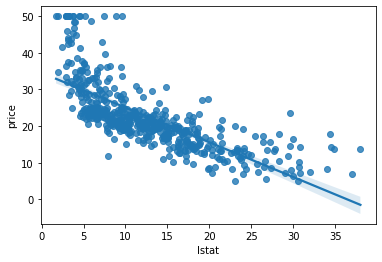

In [135]:
sns.regplot(x='lstat', y='price', data=df)

## Preparation for training the dataset 

In [136]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Spliting into train and test data


In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

#### Standardisation of dataset

In [138]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

## Model Training

In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [140]:
regressor.fit(x_train, y_train)

LinearRegression()

In [141]:
print(regressor.coef_)

[-1.02065294e-01  3.92035307e-02 -6.13494400e-02  3.48084703e+00
 -1.74598953e+01  3.66444175e+00 -5.31304197e-03 -1.37067900e+00
  2.51447673e-01 -9.43832755e-03 -8.58133141e-01  6.78308990e-03
 -4.96519703e-01]


In [142]:
print(regressor.intercept_)

35.83989431157927


## Prediction of Data

In [143]:
reg_pred = regressor.predict(x_test)
reg_pred

array([21.90897572, 32.36829283,  9.38919345, 16.40673353, 17.80964232,
       31.83838312, 25.10363218, 15.4942598 , 21.82825591, -3.63190569,
       26.12960431, 15.57300292,  5.61225053,  5.58756072, 25.41154332,
       34.70503462, 26.17912943, 19.13532445, 23.91967422, 14.91252997,
       39.53465438, 11.07641307, 36.58914352, 26.00446715, 38.64469005,
       25.17973575, 21.75528189, 18.96547913, 18.27571802, 18.60093947,
       24.62357132, 23.66620392, 29.6987949 , 24.08585329,  0.50581275,
       24.63764742, 25.21913509, 12.19902726, 39.4812705 , 32.23454473,
       23.75474746,  7.056712  , 20.39810217, 21.0026853 , 31.32729178,
        7.46193071, 12.70824342, 31.32832609, 22.40993904, 35.817382  ,
       12.81513925, 20.71658302, 18.48252207,  7.65314991,  6.48378445,
       40.45412148, 24.95009747, 24.17943728, 23.04271387,  7.56345617,
       22.86100568,  9.73479018, 32.957889  , 14.06778493, 28.52717573,
       17.20171167,  3.61911076, 28.62629983, 19.42447388, 18.72

### Scatter plot for DATA

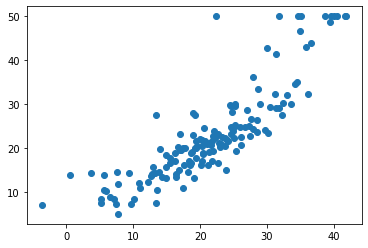

In [144]:
plt.scatter(reg_pred, y_test)

### Finding the residuals

In [145]:
residual = reg_pred - y_test

#### Residual Plot

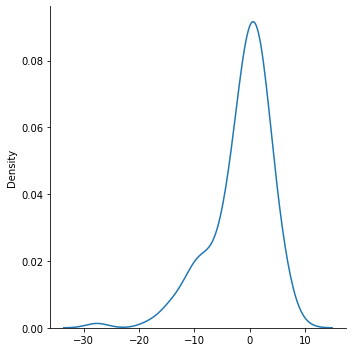

In [146]:
sns.displot(residual, kind='kde')

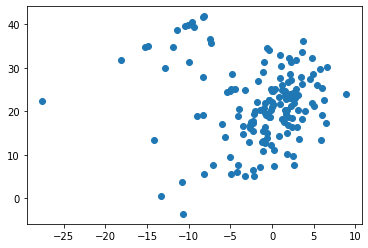

In [147]:
plt.scatter(residual, reg_pred)

####This is giving unifrom distribution

### Performance metrics

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(reg_pred, y_test))
print(mean_squared_error(reg_pred, y_test))

3.907966145625533
31.829631155557692


### Predicting New data points

In [149]:
df.tail(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [150]:
input_data = (0.10959, 0, 12.31, 0, 0.538, 6.58, 85.2, 3.0900, 1, 296, 20, 400, 4.98)
convert_data = np.asarray(input_data).reshape(1,-1)
print(regressor.predict(convert_data))

[25.63963886]


### Fantastic Prediction by our Model